# Домашнее задание "Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок"

In [11]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt 

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
</div>

In [2]:
sko = 225**0.5
a = 0.05
z = 1.96 # Найти по табличке Z-оценки для нормального распределения - если уровень доверия 95%, то нам нужно значение, слева от которого лежит 97,5% значений (0.975)
accuracy = 3 

In [3]:
 n = ((sko *z) / accuracy) ** 2

In [4]:
print(f'Минимально необходимый объем выборки: {round(n)}')

Минимально необходимый объем выборки: 96


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 12$.
</div>

In [5]:
mean_value = 130
sko = 12
n = 25
z_a = 2.33 

In [6]:
accuracy = (sko / (n**0.5)) * z_a
left_, right_ = (mean_value - accuracy), (mean_value + accuracy)
print(f'98% доверительный интервал для среднего значения = от {round(left_, 2)} до {round(right_, 2)}')

98% доверительный интервал для среднего значения = от 124.41 до 135.59


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [8]:
import scipy.stats as stats

population_men  = stats.norm.rvs(loc=171, scale=19, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=165, scale=16, size=12000)  # Выборка женщин со средним ростом 165

t, p = stats.ttest_ind(population_men, population_women)

In [9]:
# Поскольку p < a и t достаточно высокий, 
# то можно отвергнуть нулевую гипотезу и принять альтернативную - выборки различны
t, p

(35.88446260356449, 5.5427848753850205e-282)

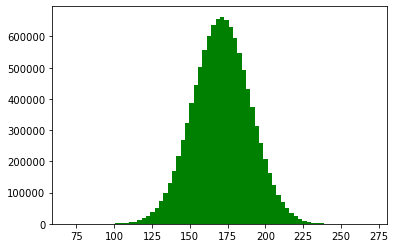

In [14]:
# Почему-то обе выборки не отображаются на одной гистограмме
plt.hist(population_women, color='orange', bins=70);
plt.hist(population_men, color='green', bins=70);
plt.show()

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [15]:
sko = 150
accuracy = 50
z = 1.96
n = ((sko * z) / accuracy) ** 2
print(f'Объем необходимой выборки для исследования среднего чека за кофе в случайном городе: {round(n)}')

Объем необходимой выборки для исследования среднего чека за кофе в случайном городе: 35


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [16]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [17]:
oddsratio, pvalue = stats.fisher_exact(observations)

oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

In [18]:
print('P-value > a. "Волшебник" скорее всего умеет предсказывать погоду')

P-value > a. "Волшебник" скорее всего умеет предсказывать погоду


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [19]:
data_3 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]



In [21]:
def mean_confidence_interval(data, confidence=0.90):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [22]:
mean_confidence_interval(data_3)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [23]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]



In [24]:
# Уровень t достаточно высокий и p достаточно низкий (меньше a = 0.001), соответственно выборки различны
t, p = stats.ttest_ind(data_1, data_2)
t, p

(7.35744682757447, 2.1159475572725764e-11)

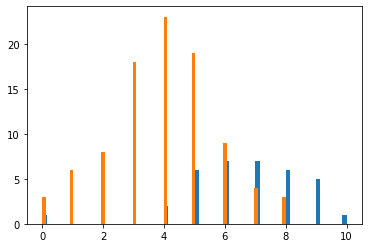

In [25]:
plt.hist(data_1, bins=70);
plt.hist(data_2, bins=70);

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [26]:
# Нужно принять альтернативную гипотезу, так как значение p-value ниже традиционного значения a (0.05)
# Распределение ненормальное

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [27]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = stats.norm.rvs(scale=10,loc=-7.5,size=300)
pharmaceuticals=np.concatenate((A,B))
pharmaceuticals.mean()

1.2012822571340978

In [28]:
# Различия случайны и объясняются «естественной» дисперсией выбранной характеристики
stats.ttest_ind(a=A,b=B,equal_var=False) 

Ttest_indResult(statistic=6.1593583482504535, pvalue=2.156662854865036e-09)

In [29]:
# Различия были бы значимы при p-value > 0.05 (например, 0.051)

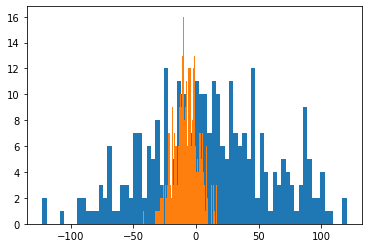

In [30]:
plt.hist(A, bins=70);
plt.hist(B, bins=70);